In [1]:
import os
import cv2
import numpy as np

dirs = ['ants', 'bees']
pixels = []
labels = []

for i, d in enumerate(dirs):
    files = os.listdir('./data/' + d)

    for f in files :
        img = cv2.imread('./data/' + d + '/' + f,0)
        img = cv2.resize(img, (128,128))
        img = np.array(img).flatten().tolist()
        pixels.append(img)

        labels.append(i)

In [2]:
import pandas as pd

pixels_df = pd.DataFrame(pixels)
pixels_df = pixels_df / 255.0

labels_df = pd.DataFrame(labels)
labels_df = labels_df.rename(columns = {0:'label'})

img_set = pd.concat([pixels_df, labels_df], axis = 1)
print(img_set.head())
print(img_set.shape)

          0         1         2         3         4         5         6  \
0  0.549020  0.552941  0.545098  0.552941  0.545098  0.556863  0.556863   
1  0.756863  0.831373  0.894118  0.815686  0.862745  0.866667  0.737255   
2  0.521569  0.545098  0.549020  0.564706  0.572549  0.592157  0.588235   
3  0.384314  0.392157  0.392157  0.396078  0.396078  0.392157  0.380392   
4  0.290196  0.337255  0.380392  0.403922  0.407843  0.411765  0.411765   

          7         8         9  ...     16375     16376     16377     16378  \
0  0.556863  0.552941  0.556863  ...  0.294118  0.282353  0.286275  0.274510   
1  0.772549  0.768627  0.219608  ...  0.866667  0.890196  0.933333  0.905882   
2  0.584314  0.580392  0.568627  ...  0.537255  0.564706  0.674510  0.541176   
3  0.388235  0.376471  0.392157  ...  0.227451  0.156863  0.066667  0.023529   
4  0.423529  0.450980  0.462745  ...  0.239216  0.250980  0.262745  0.274510   

      16379     16380     16381     16382     16383  label  
0  0.29

In [3]:
pixels2 = []
labels2 = []
tmp = []

for i, d in enumerate(dirs):
    files = os.listdir('./data/' + d)

    for f in files :
        img2 = cv2.imread('./data/' + d + '/' + f)
        img2 = cv2.resize(img2, (128,128))
        b, g, r = cv2.split(img2)
        b = np.array(b).flatten().tolist()
        g = np.array(g).flatten().tolist()
        r = np.array(r).flatten().tolist()
        tmp = b + g + r
        pixels2.append(tmp)

        labels2.append(i)

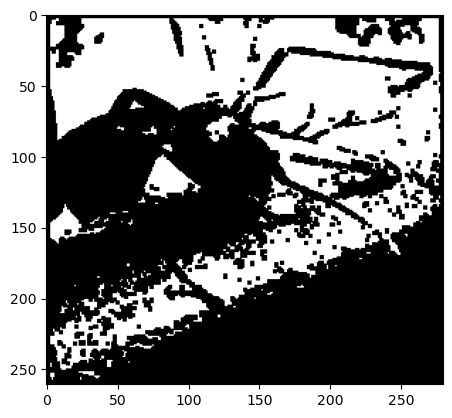

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./data/ants/swiss-army-ant.jpg',0)
ret, bin_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

kernel = np.ones((3,3), np.uint8)
img_el = cv2.erode(bin_img, kernel, iterations = 1)
plt.imshow(img_el, cmap = 'gray')

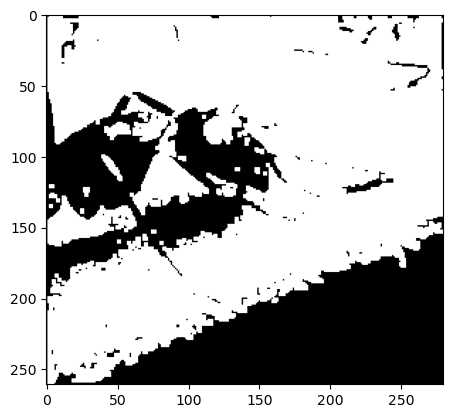

In [8]:
img_dl = cv2.dilate(bin_img, kernel, iterations = 1)
plt.imshow(img_dl, cmap = 'gray')

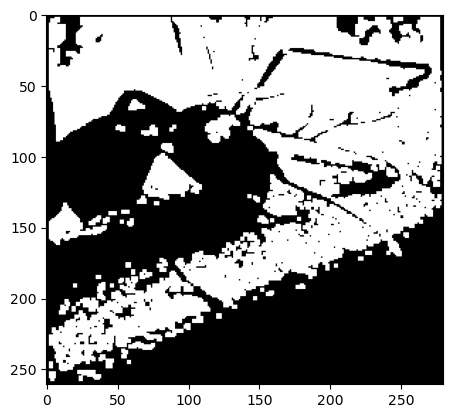

In [10]:
img_op = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel)
plt.imshow(img_op, cmap = 'gray')

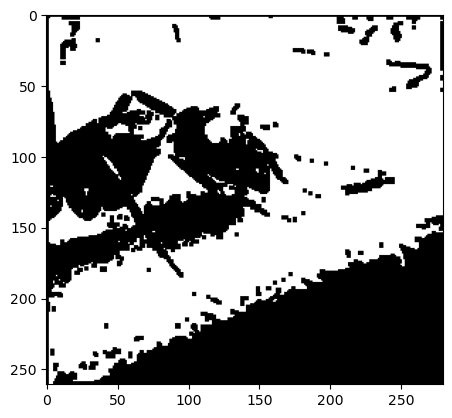

In [11]:
img_cl = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, kernel)
plt.imshow(img_cl, cmap = 'gray')

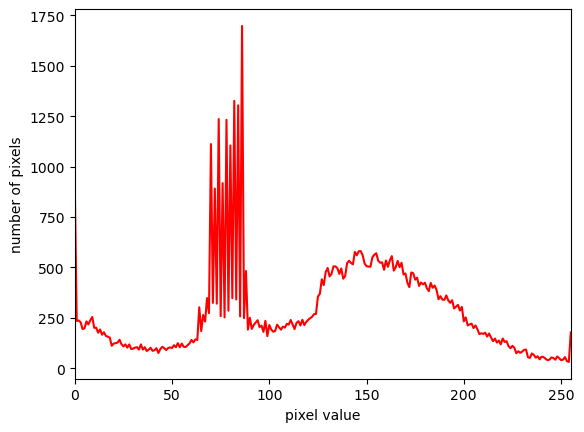

In [12]:
hist_gr, bins = np.histogram(img.ravel(), 256, [0,256])

plt.xlim(0, 255)
plt.plot(hist_gr, '-r')
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.show()

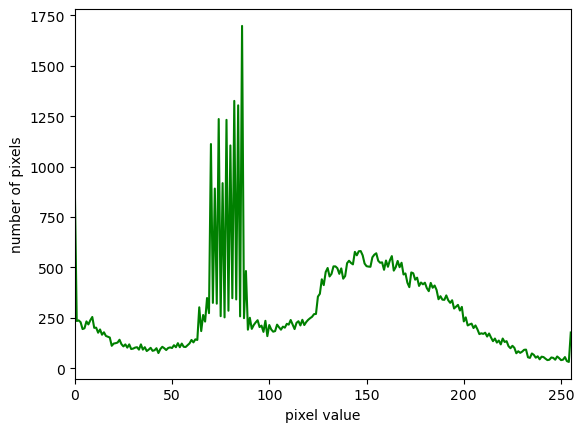

In [13]:
hist_gr, bins = np.histogram(img.ravel(), 256, [0, 256])

plt.xlim(0, 255)
plt.plot(hist_gr, '-g')
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.show()

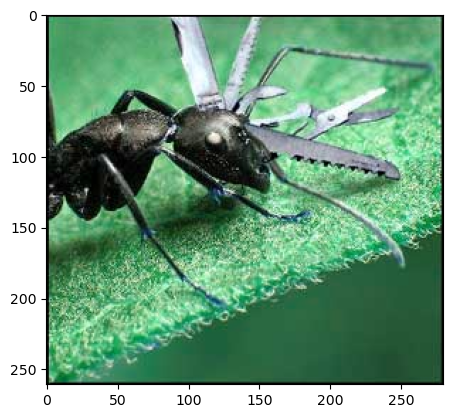

In [18]:
img = cv2.imread('./data/ants/swiss-army-ant.jpg')
plt.imshow(img)

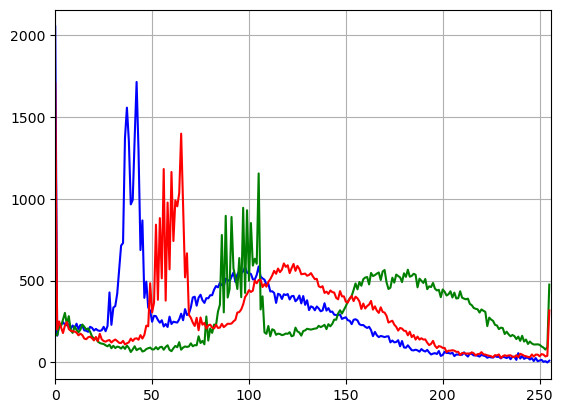

In [23]:
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])

plt.grid()
plt.show()

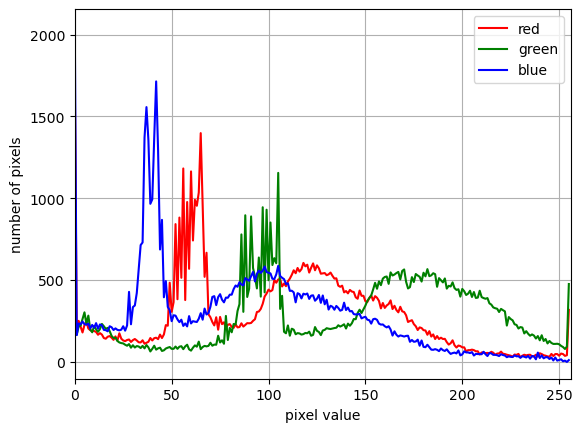

In [24]:
b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
hist_r, bins = np.histogram(r.ravel(), 256, [0,256])
hist_g, bins = np.histogram(g.ravel(), 256, [0,256])
hist_b, bins = np.histogram(b.ravel(), 256, [0,256])

plt.xlim(0,256)
plt.plot(hist_r, '-r', label ='red')
plt.plot(hist_g, '-g', label = 'green')
plt.plot(hist_b, '-b', label = 'blue')
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.legend()
plt.grid()
plt.show()